In [10]:
import numpy as np
import matplotlib.pyplot as plt

### 3.3.3 Potential Flow

Next, the boundary data immersion method is applied to a general 2D potential flow system for the second canonical example. Define a 2D velocity field $\overrightarrow{u}$ with the governing equations

$$
\mathcal{F} = \overrightarrow{u}\left(\overrightarrow{x}_f\right) - \overrightarrow{\nabla}\phi\left(\overrightarrow{x}_f\right) = 0
\tag{3.25}
$$

$$
\mathcal{B} = \overrightarrow{u}\left(\overrightarrow{x}_b\right) - \overrightarrow{U}\left(\overrightarrow{x}_b\right) = 0
\tag{3.26}
$$

where the first equation is the velocity field definition for all points $\overrightarrow{x}$ in the fluid domain and the second equation is the boundary condition requiring that the velocity math the prescribed velocity $\overrightarrow{U}$ for all the points $\overrightarrow{x}_b$ on the body. Next, a meta-equation for the velocity field is constructed which is valid over both the fluid and the body

$$
\overrightarrow{u}_\epsilon(\overrightarrow{x}) = [1-\delta_\epsilon(\overrightarrow{x})]\overrightarrow{\nabla}\phi_\epsilon(\overrightarrow{x}) + \delta_\epsilon(\overrightarrow{x})\overrightarrow{U}(\overrightarrow{x})
\tag{3.27}
$$

Where again, $\overrightarrow{u}_\epsilon$ is the velocity solution of this smoothed system, $\phi_\epsilon$ is the smoothed velocity potential and the factor $\frac{1}{c}$ as been set to unity.
This equation has one distinct difference from the previous example, namely the unknown field $\phi_\epsilon$. As standard in potential flow methods the divergence free constraint

$$
\overrightarrow{\nabla}\cdot\overrightarrow{u}(\overrightarrow{x}) = \nabla^2\phi(\overrightarrow{x}) = 0
\tag{3.28}
$$

is required to solve for the potential, and therefore the velocity field. The governing equation for the potential $\phi_\epsilon$ is derived by taking the divergence of equation 3.27 to write

$$
\overrightarrow{\nabla}\cdot[1-\delta_\epsilon(\overrightarrow{x})]\overrightarrow{\nabla}\phi_\epsilon(\overrightarrow{x}) = -\overrightarrow{\nabla}\cdot\delta_\epsilon(\overrightarrow{x})\overrightarrow{U}(\overrightarrow{x})
\tag{3.29}
$$

(0.0, 1.0, 0.0, 1.0)

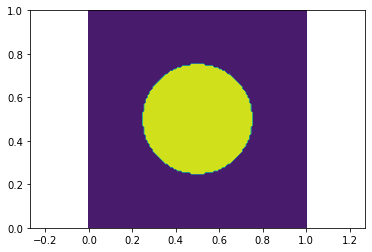

In [205]:
Nx = 128
Ny = 128
L = 1
H = 1
dx = L/Nx
dy = L/Ny
x = np.linspace(0,L,Nx)
y = np.linspace(0,H,Ny)
XX,YY = np.meshgrid(x, y)
U = 1

xc = L/2
yc = H/2
rad = 0.25

d = np.sqrt((XX-xc)**2 + (YY-yc)**2)-rad
fig, ax = plt.subplots()
ax.contourf(XX, YY, d<0)
ax.axis('equal')

The distance can be found by using the radial coordinates

(0.0, 1.0, 0.0, 1.0)

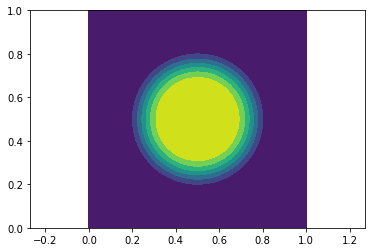

In [206]:
def smoothing_kernel(d, e):
    delta = np.zeros_like(d)
    delta[abs(d)/e < 1] = 0.5 *(1+np.sin((-np.pi/2)*(d[abs(d)/e < 1]/e)))
    delta[d/e < -1] = 1
    return delta

delta = smoothing_kernel(d, 0.1)

fig, ax = plt.subplots()
ax.contourf(XX, YY, delta*U)
ax.axis('equal')

[(-0.5, 127.5, 127.5, -0.5), (-0.05, 1.05, -0.05, 1.05)]

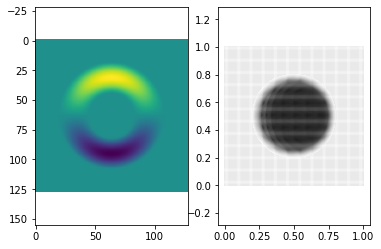

In [218]:
def divergence(f, dx, dy):
    """
    Computes the divergence of the vector field f, corresponding to dFx/dx + dFy/dy + ...
    :param f: List of ndarrays, where every item of the list is one dimension of the vector field
    :return: Single ndarray of the same shape as each of the items in f, which corresponds to a scalar field
    """
    d = [dx,dy]
    num_dims = len(f)
    return np.ufunc.reduce(np.add, [np.gradient(f[i], d[i], axis=i) for i in range(num_dims)])

U = 1
V = 0

U = delta*U
V = delta*V
f = [U, V]

divU = divergence(f, dx, dy)
fig, ax = plt.subplots(1,2)
ax[0].imshow(divU)
ax[1].quiver(x, y, U, V)
[ax[i].axis('equal') for i in range(len(ax))]

We will solve the possion equation

$$
\nabla^2 \phi = f
$$

using a Jacobian update formula. Where $\phi$ is the potential field, with the kernel applied and $f$ is the divergence of the body field. The weighted Jacobi iterations are

$$
\phi^{new}_{i,j} = (1-\omega)\phi_{i,j} + \omega(\phi_{i-1,j} + \phi_{i+1,j} + \phi_{i,j-1} + \phi_{i,j+1} - h^2f_{i,j})/4
$$

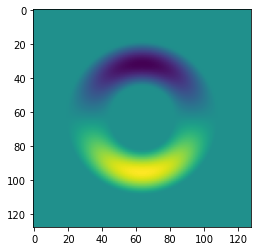

In [219]:
import numpy as np

def jacobi_step(v, f, update_matrix):
    
    # How many rows and columns
    m, n = v.shape
    
    v_update = v.copy()
    
    for i in range(1, m-1):
        for j in range(1, n-1):
            v_update[i,j] = (v[i+1,j] + v[i-1,j] + v[i,j-1] + v[i, j+1] + f[i,j])/4
    
    return v_update

nsteps = 100

v = np.ones((Nx, Ny))

update_matrix = laplacian_matrix(Nx, Ny, dx, dy)

for i in range(nsteps):
    phi = jacobi_step(v, -divU, update_matrix)

plt.imshow(phi)